In [531]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as skl
from sklearn.metrics import precision_recall_fscore_support
from fairmlhealth import report, measure, stat_utils
from sklearn.tree import DecisionTreeClassifier
import xgboost 
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import warnings
from sklearn import metrics
warnings.filterwarnings('ignore')

In [532]:
# reads the data set from the file
data = pd.read_csv("SouthGermanCredit.csv")

In [533]:
data.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


In [534]:
data.columns

Index(['status', 'duration', 'credit_history', 'purpose', 'amount', 'savings',
       'employment_duration', 'installment_rate', 'personal_status_sex',
       'other_debtors', 'present_residence', 'property', 'age',
       'other_installment_plans', 'housing', 'number_credits', 'job',
       'people_liable', 'telephone', 'foreign_worker', 'credit_risk'],
      dtype='object')

<AxesSubplot:>

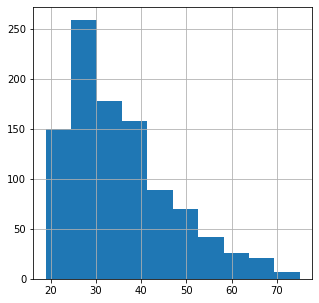

In [535]:
data['age'].hist(figsize=(5,5))

<AxesSubplot:>

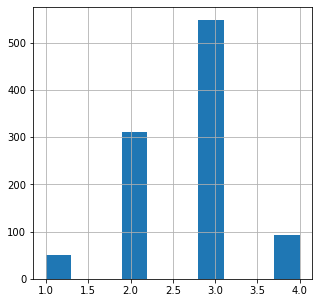

In [536]:
data['personal_status_sex'].hist(figsize=(5,5))

#### Converting age and personal_status_sex columns to protected variables

In [537]:
data['personal_status_sex'].unique()

array([2, 3, 4, 1])

In [538]:
data['age'].unique()

array([21, 36, 23, 39, 38, 48, 40, 65, 24, 31, 44, 25, 37, 49, 33, 26, 51,
       29, 56, 47, 34, 28, 41, 58, 61, 30, 63, 27, 45, 43, 52, 22, 60, 32,
       35, 42, 59, 54, 64, 46, 74, 50, 20, 55, 53, 19, 57, 66, 68, 70, 67,
       75, 62])

In [539]:
# In column age mapping <30 -> 0 and >30 -> 1
df = data.copy()
for i in range(1000):
    if df.at[i,'age']>30:
        df.at[i,'age']=1
    else:
        df.at[i,'age']=0        
df

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,18,4,2,1049,1,2,4,2,1,...,2,0,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,1,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,0,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,1,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,1,1,2,2,2,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,24,2,3,1987,1,3,2,3,1,...,1,0,3,1,1,2,1,1,2,0
996,1,24,2,0,2303,1,5,4,3,2,...,1,1,3,2,1,3,2,1,2,0
997,4,21,4,0,12680,5,5,4,3,1,...,4,0,3,3,1,4,2,2,2,0
998,2,12,2,3,6468,5,1,2,3,1,...,4,1,3,2,1,4,2,2,2,0


<AxesSubplot:>

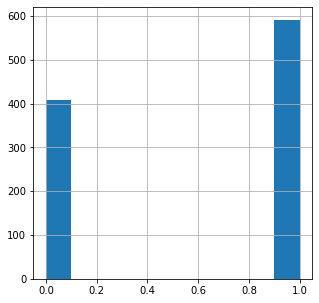

In [540]:
df['age'].hist(figsize=(5,5))

In [541]:
# In column personal_status_sex mapping 1,2 -> 0 and 3,4->1
for i in range(1000):
    if df.at[i,'personal_status_sex']<=2:
        df.at[i,'personal_status_sex']=0
    else:
        df.at[i,'personal_status_sex']=1        
df

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,18,4,2,1049,1,2,4,0,1,...,2,0,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,1,1,...,1,1,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,0,1,...,1,0,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,1,1,...,1,1,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,1,1,...,2,1,1,2,2,2,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,24,2,3,1987,1,3,2,1,1,...,1,0,3,1,1,2,1,1,2,0
996,1,24,2,0,2303,1,5,4,1,2,...,1,1,3,2,1,3,2,1,2,0
997,4,21,4,0,12680,5,5,4,1,1,...,4,0,3,3,1,4,2,2,2,0
998,2,12,2,3,6468,5,1,2,1,1,...,4,1,3,2,1,4,2,2,2,0


<AxesSubplot:>

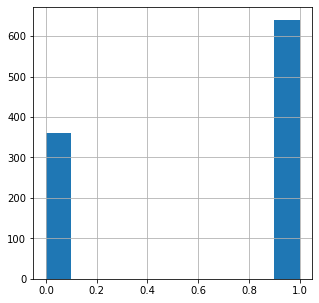

In [542]:
df['personal_status_sex'].hist(figsize=(5,5))

#### Performance Metrics

#### Fairness Report

In [543]:
from sklearn.model_selection import train_test_split

dk = df.copy()
y1 = dk['credit_risk']
x1 = dk.drop('credit_risk',1)

x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2, random_state=0)

#print("Model Logistic Regression:")
#model_lr = skl.linear_model.LogisticRegression(max_iter=1000)
#model_lr.fit(x_train, y_train)
#predict_lr = model_lr.predict(x_test)
#print(precision_recall_fscore_support(y_test, predict_lr))



In [544]:
print("Model Logistic Regression:")
model_lr = skl.linear_model.LogisticRegression(max_iter=1000)
model_lr.fit(x_train, y_train)
predict_lr = model_lr.predict(x_test)
print("accuracy",metrics.accuracy_score(y_test, predict_lr))
print("f1 score macro",metrics.f1_score(y_test, predict_lr, average='macro')) 
print("f1 score micro",metrics.f1_score(y_test, predict_lr, average='micro'))
print("precision score",metrics.precision_score(y_test, predict_lr, average='macro'))
print("recall score",metrics.recall_score(y_test, predict_lr, average='macro'))
print("AUC&ROC",metrics.roc_auc_score(y_test, predict_lr))
report.compare(test_data = x_test, 
               targets = y_test, 
               protected_attr = {'age': x_test['age'], 
                                 'personal_status_sex': x_test['personal_status_sex']}, 
               models = model_lr
              )

Model Logistic Regression:
accuracy 0.785
f1 score macro 0.7288691320659542
f1 score micro 0.785
precision score 0.792376131308483
recall score 0.7123440285204992
AUC&ROC 0.7123440285204992


In [545]:

print("Model Naive Bayes:")
model_nb = skl.naive_bayes.GaussianNB()
model_nb.fit(x_train, y_train)
predict_nb = model_nb.predict(x_test)
print("accuracy",metrics.accuracy_score(y_test, predict_nb))
print("f1 score macro",metrics.f1_score(y_test, predict_nb, average='macro'))    
print("f1 score micro",metrics.f1_score(y_test, predict_nb, average='micro'))
print("precision score",metrics.precision_score(y_test, predict_nb, average='macro'))
print("recall score",metrics.recall_score(y_test, predict_nb, average='macro'))
print("AUC&ROC",metrics.roc_auc_score(y_test, predict_nb))
report.compare(test_data = x_test, 
               targets = y_test, 
               protected_attr = {'age': x_test['age'], 
                                 'personal_status_sex': x_test['personal_status_sex']}, 
               models =  model_nb
              )



Model Naive Bayes:
accuracy 0.785
f1 score macro 0.755952212037799
f1 score micro 0.785
precision score 0.7616151083304368
recall score 0.7515597147950089
AUC&ROC 0.7515597147950088


In [546]:
print("Model Decision Tree:")
model_dt = skl.tree.DecisionTreeClassifier(max_depth=3)
model_dt.fit(x_train, y_train)
predict_dt = model_dt.predict(x_test)
print("accuracy",metrics.accuracy_score(y_test, predict_dt))
print("f1 score macro",metrics.f1_score(y_test, predict_dt, average='macro'))    
print("f1 score micro",metrics.f1_score(y_test, predict_dt, average='micro'))
print("precision score",metrics.precision_score(y_test, predict_dt, average='macro'))
print("recall score",metrics.recall_score(y_test, predict_dt, average='macro'))
print("AUC&ROC",metrics.roc_auc_score(y_test, predict_dt))
report.compare(test_data = x_test, 
               targets = y_test, 
               protected_attr = {'age': x_test['age'], 
                                 'personal_status_sex': x_test['personal_status_sex']}, 
               models = model_dt
              )



Model Decision Tree:
accuracy 0.7
f1 score macro 0.555621389423789
f1 score micro 0.7
precision score 0.7100122100122099
recall score 0.5766488413547237
AUC&ROC 0.5766488413547237


In [547]:
print("Model XGBoost:")
model_xgb = xgboost.XGBClassifier(eval_metric='logloss',use_label_encoder=False)
model_xgb.fit(x_train, y_train)
predict_xgb = model_xgb.predict(x_test)
print("accuracy",metrics.accuracy_score(y_test, predict_xgb))
print("f1 score macro",metrics.f1_score(y_test, predict_xgb, average='macro'))    
print("f1 score micro",metrics.f1_score(y_test, predict_xgb, average='micro'))
print("precision score",metrics.precision_score(y_test, predict_xgb, average='macro'))
print("recall score",metrics.recall_score(y_test, predict_xgb, average='macro'))
print("AUC&ROC",metrics.roc_auc_score(y_test, predict_xgb))
report.compare(test_data = x_test, 
               targets = y_test, 
               protected_attr = {'age': x_test['age'], 
                                 'personal_status_sex': x_test['personal_status_sex']}, 
               models = model_xgb
              )



Model XGBoost:
accuracy 0.76
f1 score macro 0.7085964060223409
f1 score micro 0.76
precision score 0.7423245614035088
recall score 0.696969696969697
AUC&ROC 0.696969696969697


In [548]:
print("Model Random Forest:")
model_rf = RandomForestClassifier(n_estimators=100)
model_rf.fit(x_train, y_train)
predict_rf = model_rf.predict(x_test)
print("accuracy",metrics.accuracy_score(y_test, predict_rf))
print("f1 score macro",metrics.f1_score(y_test, predict_rf, average='macro'))    
print("f1 score micro",metrics.f1_score(y_test, predict_rf, average='micro'))
print("precision score",metrics.precision_score(y_test, predict_rf, average='macro'))
print("recall score",metrics.recall_score(y_test, predict_rf, average='macro'))
print("AUC&ROC",metrics.roc_auc_score(y_test, predict_rf))
report.compare(test_data = x_test, 
               targets = y_test, 
               protected_attr = {'age': x_test['age'], 
                                 'personal_status_sex': x_test['personal_status_sex']}, 
               models = model_rf
              )

Model Random Forest:
accuracy 0.805
f1 score macro 0.7481840193704601
f1 score micro 0.805
precision score 0.838583982755762
recall score 0.7274955436720143
AUC&ROC 0.7274955436720143


#### Conclusion:
In case of Performance Random forest and XGBoost perform better compared to other models. Performance of decision tree is poor when compared to all other models.


In case of Fairness if model is fair if Statistical Ratio (i.e disparte impact ratio & equal odds ratio) lies b/w 0.8-1.2 and Statistical Difference (i.e. Equal Odds Difference, Predictive Parity Difference) lies b/w -0.1 to 0.1. 
For protected attribute 'personal_status_sex' random forest model is performing fairly with all the parameters within bounds and for attribute 'age' decision tree is performing more fairly with all parameters within bounds. Overall Random forest model is performing more fairly when compared to other models.

In [549]:
#predicting target values on entire dataset which is required as input for shadow models
predict_lr_all = model_lr.predict(x1)
predict_nb_all = model_nb.predict(x1)
predict_dt_all = model_dt.predict(x1)
predict_xgb_all = model_xgb.predict(x1)
predict_rf_all = model_rf.predict(x1)


### HW  Q5 Solution

###### Model Decision Tree for Logistic regression input:

In [550]:
df1 = df.copy()
df1['score_LR'] = predict_lr_all
df1

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk,score_LR
0,1,18,4,2,1049,1,2,4,0,1,...,0,3,1,1,3,2,1,2,1,0
1,1,9,4,0,2799,1,3,2,1,1,...,1,3,1,2,3,1,1,2,1,1
2,2,12,2,9,841,2,4,2,0,1,...,0,3,1,1,2,2,1,2,1,1
3,1,12,4,0,2122,1,3,3,1,1,...,1,3,1,2,2,1,1,1,1,1
4,1,12,4,0,2171,1,3,4,1,1,...,1,1,2,2,2,2,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,24,2,3,1987,1,3,2,1,1,...,0,3,1,1,2,1,1,2,0,1
996,1,24,2,0,2303,1,5,4,1,2,...,1,3,2,1,3,2,1,2,0,1
997,4,21,4,0,12680,5,5,4,1,1,...,0,3,3,1,4,2,2,2,0,1
998,2,12,2,3,6468,5,1,2,1,1,...,1,3,2,1,4,2,2,2,0,1


In [551]:
y_lr = df1['score_LR']
x_lr = df1.drop(['score_LR','credit_risk'],1)
x1_train, x1_test, y1_train, y1_test = train_test_split(x_lr, y_lr, test_size=0.2, random_state=0)


In [552]:
model_dt1 = skl.tree.DecisionTreeClassifier(max_depth=3)
model_dt1.fit(x1_train, y1_train)
predict_dt1 = model_dt1.predict(x1_test)
print("accuracy",metrics.accuracy_score(y1_test, predict_dt1))
print("f1 score macro",metrics.f1_score(y1_test, predict_dt1, average='macro'))    
print("f1 score micro",metrics.f1_score(y1_test, predict_dt1, average='micro'))
print("precision score",metrics.precision_score(y1_test, predict_dt1, average='macro'))
print("recall score",metrics.recall_score(y1_test, predict_dt1, average='macro'))
print("AUC&ROC",metrics.roc_auc_score(y1_test, predict_dt1))
report.compare(test_data = x1_test, 
               targets = y1_test, 
               protected_attr = {'age': x1_test['age'], 
                                 'personal_status_sex': x1_test['personal_status_sex']}, 
               models = model_dt1
              )

accuracy 0.845
f1 score macro 0.7795085173725951
f1 score micro 0.845
precision score 0.7633333333333333
recall score 0.8029605767755791
AUC&ROC 0.8029605767755791


###### Model Decision Tree for Naive Bayes input:

In [553]:
df2 = df.copy()
df2['score_NB'] = predict_nb_all
df2

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk,score_NB
0,1,18,4,2,1049,1,2,4,0,1,...,0,3,1,1,3,2,1,2,1,0
1,1,9,4,0,2799,1,3,2,1,1,...,1,3,1,2,3,1,1,2,1,1
2,2,12,2,9,841,2,4,2,0,1,...,0,3,1,1,2,2,1,2,1,0
3,1,12,4,0,2122,1,3,3,1,1,...,1,3,1,2,2,1,1,1,1,1
4,1,12,4,0,2171,1,3,4,1,1,...,1,1,2,2,2,2,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,24,2,3,1987,1,3,2,1,1,...,0,3,1,1,2,1,1,2,0,0
996,1,24,2,0,2303,1,5,4,1,2,...,1,3,2,1,3,2,1,2,0,1
997,4,21,4,0,12680,5,5,4,1,1,...,0,3,3,1,4,2,2,2,0,0
998,2,12,2,3,6468,5,1,2,1,1,...,1,3,2,1,4,2,2,2,0,1


In [554]:
y_nb = df2['score_NB']
x_nb = df2.drop(['score_NB','credit_risk'],1)
x2_train, x2_test, y2_train, y2_test = train_test_split(x_nb, y_nb, stratify=y_nb, test_size=0.2, random_state=60)

In [555]:
print("Model Decision Tree for Naive Bayes input:")
model_dt2 = skl.tree.DecisionTreeClassifier(max_depth=3)
model_dt2.fit(x2_train, y2_train)
predict_dt2 = model_dt2.predict(x2_test)
print("accuracy",metrics.accuracy_score(y2_test, predict_dt2))
print("f1 score macro",metrics.f1_score(y2_test, predict_dt2, average='macro'))    
print("f1 score micro",metrics.f1_score(y2_test, predict_dt2, average='micro'))
print("precision score",metrics.precision_score(y2_test, predict_dt2, average='macro'))
print("recall score",metrics.recall_score(y2_test, predict_dt2, average='macro'))
print("AUC&ROC",metrics.roc_auc_score(y2_test, predict_dt2))
report.compare(test_data = x2_test, 
               targets = y2_test, 
               protected_attr = {'age': x2_test['age'], 
                                 'personal_status_sex': x2_test['personal_status_sex']}, 
               models = model_dt2
              )

Model Decision Tree for Naive Bayes input:
accuracy 0.79
f1 score macro 0.7450218552695482
f1 score micro 0.79
precision score 0.7645530145530146
recall score 0.7339154411764706
AUC&ROC 0.7339154411764706


###### Model Decision Tree for decision tree input:

In [556]:
df3 = df.copy()
df3['score_DT'] = predict_dt_all
df3

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk,score_DT
0,1,18,4,2,1049,1,2,4,0,1,...,0,3,1,1,3,2,1,2,1,1
1,1,9,4,0,2799,1,3,2,1,1,...,1,3,1,2,3,1,1,2,1,1
2,2,12,2,9,841,2,4,2,0,1,...,0,3,1,1,2,2,1,2,1,1
3,1,12,4,0,2122,1,3,3,1,1,...,1,3,1,2,2,1,1,1,1,1
4,1,12,4,0,2171,1,3,4,1,1,...,1,1,2,2,2,2,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,24,2,3,1987,1,3,2,1,1,...,0,3,1,1,2,1,1,2,0,1
996,1,24,2,0,2303,1,5,4,1,2,...,1,3,2,1,3,2,1,2,0,1
997,4,21,4,0,12680,5,5,4,1,1,...,0,3,3,1,4,2,2,2,0,0
998,2,12,2,3,6468,5,1,2,1,1,...,1,3,2,1,4,2,2,2,0,1


In [557]:
y_dt = df3['score_DT']
x_dt = df3.drop(['score_DT','credit_risk'],1)
x3_train, x3_test, y3_train, y3_test = train_test_split(x_dt, y_dt, stratify=y_dt, test_size=0.2, random_state=60)

In [558]:
print("Model Decision Tree for Decision Tree input:")
model_dt3 = skl.tree.DecisionTreeClassifier(max_depth=3)
model_dt3.fit(x3_train, y3_train)
predict_dt3 = model_dt3.predict(x3_test)
print("accuracy",metrics.accuracy_score(y3_test, predict_dt3))
print("f1 score macro",metrics.f1_score(y3_test, predict_dt3, average='macro'))    
print("f1 score micro",metrics.f1_score(y3_test, predict_dt3, average='micro'))
print("precision score",metrics.precision_score(y3_test, predict_dt3, average='macro'))
print("recall score",metrics.recall_score(y3_test, predict_dt3, average='macro'))
print("AUC&ROC",metrics.roc_auc_score(y3_test, predict_dt3))
report.compare(test_data = x3_test, 
               targets = y3_test, 
               protected_attr = {'age': x3_test['age'], 
                                 'personal_status_sex': x3_test['personal_status_sex']}, 
               models = model_dt3
              )

Model Decision Tree for Decision Tree input:
accuracy 0.985
f1 score macro 0.9624413145539905
f1 score micro 0.985
precision score 0.9536968803733726
recall score 0.9716547497446374
AUC&ROC 0.9716547497446375


###### Model Decision Tree for XGBoost input:

In [559]:
df4 = df.copy()
df4['score_XGB'] = predict_xgb_all
df4

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk,score_XGB
0,1,18,4,2,1049,1,2,4,0,1,...,0,3,1,1,3,2,1,2,1,1
1,1,9,4,0,2799,1,3,2,1,1,...,1,3,1,2,3,1,1,2,1,1
2,2,12,2,9,841,2,4,2,0,1,...,0,3,1,1,2,2,1,2,1,1
3,1,12,4,0,2122,1,3,3,1,1,...,1,3,1,2,2,1,1,1,1,1
4,1,12,4,0,2171,1,3,4,1,1,...,1,1,2,2,2,2,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,24,2,3,1987,1,3,2,1,1,...,0,3,1,1,2,1,1,2,0,0
996,1,24,2,0,2303,1,5,4,1,2,...,1,3,2,1,3,2,1,2,0,1
997,4,21,4,0,12680,5,5,4,1,1,...,0,3,3,1,4,2,2,2,0,0
998,2,12,2,3,6468,5,1,2,1,1,...,1,3,2,1,4,2,2,2,0,0


In [560]:
y_xgb = df4['score_XGB']
x_xgb = df4.drop(['score_XGB','credit_risk'],1)
x4_train, x4_test, y4_train, y4_test = train_test_split(x_xgb, y_xgb, stratify=y_xgb, test_size=0.2, random_state=60)

In [561]:
print("Model Decision Tree for XGBoost input:")
model_dt4 = skl.tree.DecisionTreeClassifier(max_depth=3)
model_dt4.fit(x4_train, y4_train)
predict_dt4 = model_dt4.predict(x4_test)
print("accuracy",metrics.accuracy_score(y4_test, predict_dt4))
print("f1 score macro",metrics.f1_score(y4_test, predict_dt4, average='macro'))    
print("f1 score micro",metrics.f1_score(y4_test, predict_dt4, average='micro'))
print("precision score",metrics.precision_score(y4_test, predict_dt4, average='macro'))
print("recall score",metrics.recall_score(y4_test, predict_dt4, average='macro'))
print("AUC&ROC",metrics.roc_auc_score(y4_test, predict_dt4))
report.compare(test_data = x4_test, 
               targets = y4_test, 
               protected_attr = {'age': x4_test['age'], 
                                 'personal_status_sex': x4_test['personal_status_sex']}, 
               models = model_dt4
              )

Model Decision Tree for XGBoost input:
accuracy 0.72
f1 score macro 0.5038979447200567
f1 score micro 0.72
precision score 0.6170212765957447
recall score 0.5327380952380952
AUC&ROC 0.5327380952380952


###### Model Decision Tree for Random forest input:

In [562]:
df5 = df.copy()
df5['score_RF'] = predict_rf_all
df5

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk,score_RF
0,1,18,4,2,1049,1,2,4,0,1,...,0,3,1,1,3,2,1,2,1,1
1,1,9,4,0,2799,1,3,2,1,1,...,1,3,1,2,3,1,1,2,1,1
2,2,12,2,9,841,2,4,2,0,1,...,0,3,1,1,2,2,1,2,1,1
3,1,12,4,0,2122,1,3,3,1,1,...,1,3,1,2,2,1,1,1,1,1
4,1,12,4,0,2171,1,3,4,1,1,...,1,1,2,2,2,2,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,24,2,3,1987,1,3,2,1,1,...,0,3,1,1,2,1,1,2,0,0
996,1,24,2,0,2303,1,5,4,1,2,...,1,3,2,1,3,2,1,2,0,0
997,4,21,4,0,12680,5,5,4,1,1,...,0,3,3,1,4,2,2,2,0,0
998,2,12,2,3,6468,5,1,2,1,1,...,1,3,2,1,4,2,2,2,0,0


In [563]:
y_rf = df5['score_RF']
x_rf = df5.drop(['score_RF','credit_risk'],1)
x5_train, x5_test, y5_train, y5_test = train_test_split(x_rf, y_rf, stratify=y_rf, test_size=0.2, random_state=60)

In [564]:
print("Model Decision Tree for Random forest input:")
model_dt5 = skl.tree.DecisionTreeClassifier(max_depth=3)
model_dt5.fit(x5_train, y5_train)
predict_dt5 = model_dt5.predict(x5_test)
print("accuracy",metrics.accuracy_score(y5_test, predict_dt5))
print("f1 score macro",metrics.f1_score(y5_test, predict_dt5, average='macro'))    
print("f1 score micro",metrics.f1_score(y5_test, predict_dt5, average='micro'))
print("precision score",metrics.precision_score(y5_test, predict_dt5, average='macro'))
print("recall score",metrics.recall_score(y5_test, predict_dt5, average='macro'))
print("AUC&ROC",metrics.roc_auc_score(y5_test, predict_dt5))
report.compare(test_data = x5_test, 
               targets = y5_test, 
               protected_attr = {'age': x5_test['age'], 
                                 'personal_status_sex': x5_test['personal_status_sex']}, 
               models = model_dt5
              )

Model Decision Tree for Random forest input:
accuracy 0.7
f1 score macro 0.6052112120015792
f1 score micro 0.7
precision score 0.6101973684210527
recall score 0.601978691019787
AUC&ROC 0.6019786910197868


### Visualizing Decision trees 

In [565]:
from sklearn import tree

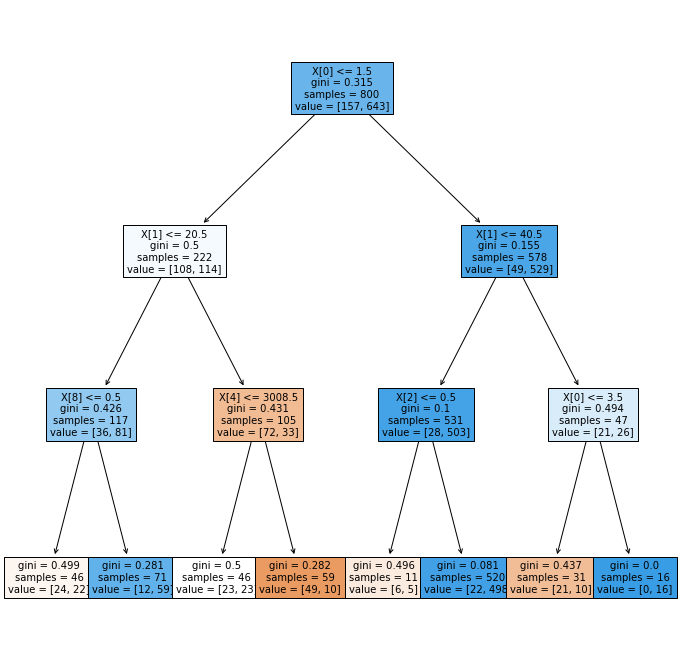

In [566]:
p1 = plt.figure(figsize=(12,12))  # set plot size (denoted in inches)
tree.plot_tree(model_dt1, filled=True, fontsize=10)
p1.show()

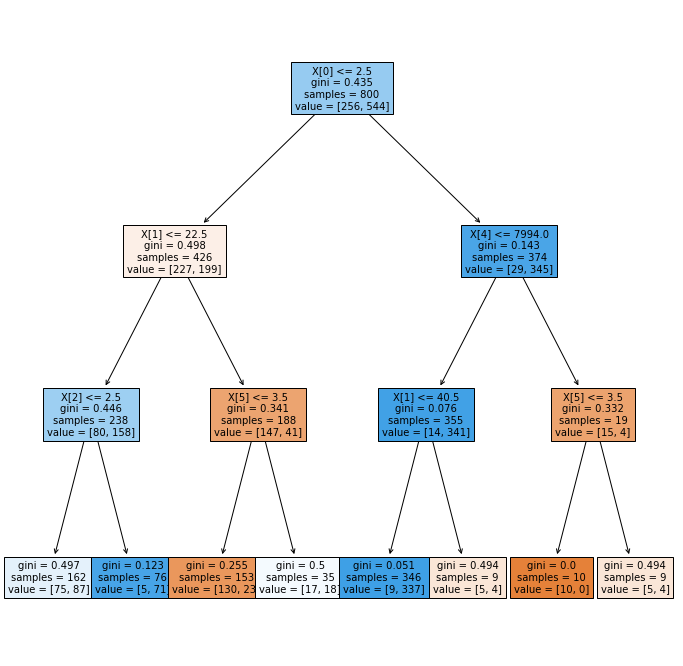

In [567]:
p2 = plt.figure(figsize=(12,12))
tree.plot_tree(model_dt2, filled=True, fontsize=10)
p2.show()

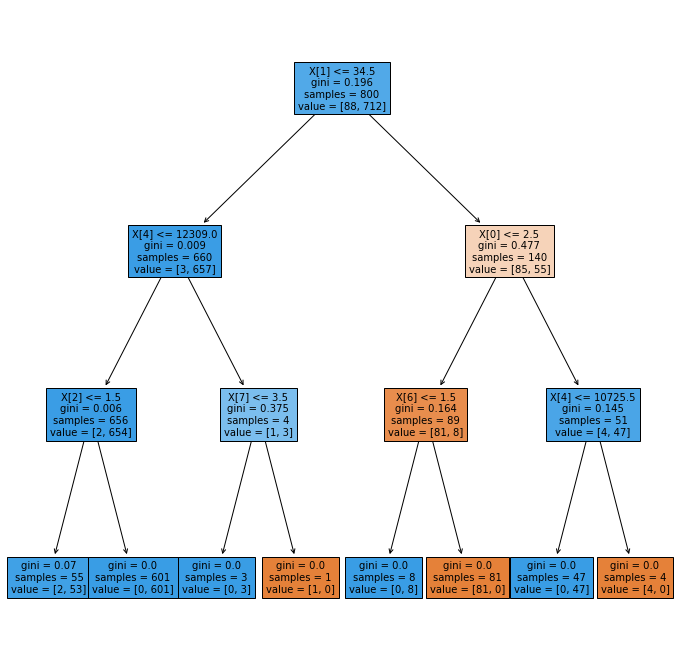

In [568]:
p3 = plt.figure(figsize=(12,12))
tree.plot_tree(model_dt3, filled=True, fontsize=10)
p3.show()

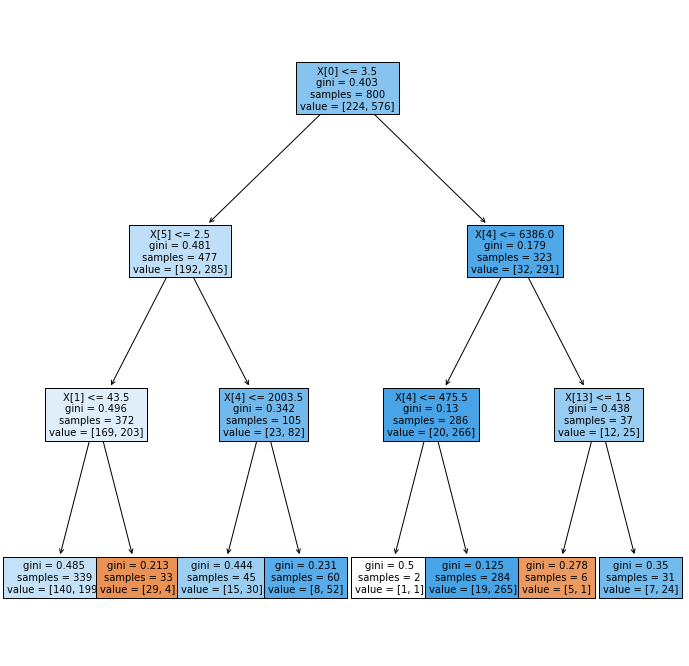

In [569]:
p4 = plt.figure(figsize=(12,12))
tree.plot_tree(model_dt4, filled=True, fontsize=10)
p4.show()

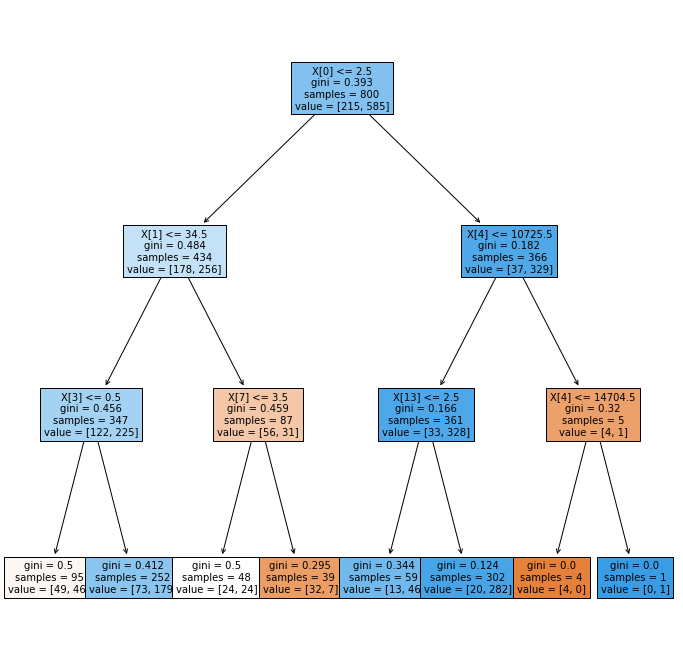

In [570]:
p5 = plt.figure(figsize=(12,12))
tree.plot_tree(model_dt5, filled=True, fontsize=10)
p5.show()

### Commonalities between all the above plotted decision trees:
    

In [571]:
def TreePlotInfo(model):
    n_nodes = model.tree_.node_count
    children_left = model.tree_.children_left
    children_right = model.tree_.children_right
    feature = model.tree_.feature
    threshold = model.tree_.threshold
    node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
    is_leaves = np.zeros(shape=n_nodes, dtype=bool)
    stack = [(0, 0)]  # start with the root node id (0) and its depth (0)
    while len(stack) > 0:
        # `pop` ensures each node is only visited once
        node_id, depth = stack.pop()
        node_depth[node_id] = depth

        # If the left and right child of a node is not the same we have a split
        # node
        is_split_node = children_left[node_id] != children_right[node_id]
        # If a split node, append left and right children and depth to `stack`
        # so we can loop through them
        if is_split_node:
            stack.append((children_left[node_id], depth + 1))
            stack.append((children_right[node_id], depth + 1))
        else:
            is_leaves[node_id] = True

    print(
        "The binary tree structure has {n} nodes and has "
        "the following tree structure:\n".format(n=n_nodes)
        )
    for i in range(n_nodes):
        if is_leaves[i]:
            print("{space}node={node} is a leaf node.".format(
                    space=node_depth[i] * "\t", node=i))
        else:
            print(
                "{space}node={node} is a split node: "
                "go to node {left} if X[:, {feature}] <= {threshold} "
                "else to node {right}.".format(
                    space=node_depth[i] * "\t",
                    node=i,
                    left=children_left[i],
                    feature=feature[i],
                    threshold=threshold[i],
                    right=children_right[i],))

In [572]:
print("For Decision tree with Logistic regression input")
TreePlotInfo(model_dt1)
print("\n\n")
print("For Decision tree with Naive Bayes input")
TreePlotInfo(model_dt2)
print("\n\n")
print("For Decision tree with Decision tree input")
TreePlotInfo(model_dt3)
print("\n\n")
print("For Decision tree with XGBoost input")
TreePlotInfo(model_dt4)
print("\n\n")
print("For Decision tree with Random Forest input")
TreePlotInfo(model_dt5)

For Decision tree with Logistic regression input
The binary tree structure has 15 nodes and has the following tree structure:

node=0 is a split node: go to node 1 if X[:, 0] <= 1.5 else to node 8.
	node=1 is a split node: go to node 2 if X[:, 1] <= 20.5 else to node 5.
		node=2 is a split node: go to node 3 if X[:, 8] <= 0.5 else to node 4.
			node=3 is a leaf node.
			node=4 is a leaf node.
		node=5 is a split node: go to node 6 if X[:, 4] <= 3008.5 else to node 7.
			node=6 is a leaf node.
			node=7 is a leaf node.
	node=8 is a split node: go to node 9 if X[:, 1] <= 40.5 else to node 12.
		node=9 is a split node: go to node 10 if X[:, 2] <= 0.5 else to node 11.
			node=10 is a leaf node.
			node=11 is a leaf node.
		node=12 is a split node: go to node 13 if X[:, 0] <= 3.5 else to node 14.
			node=13 is a leaf node.
			node=14 is a leaf node.



For Decision tree with Naive Bayes input
The binary tree structure has 15 nodes and has the following tree structure:

node=0 is a split nod

###### All the decision trees have commonalities in total number of nodes, depth and leaf nodes. All the decision trees vary in their spilt nodes